In [691]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join

import scipy.sparse

import time

import pickle

sns.set()

In [2]:
%matplotlib inline

## 1. Load prepared data

Load song master table and reduced table

In [289]:
# Load master song table with added metadata
master = pd.read_pickle('../data/master200.pkl')
master_reduced = pd.read_pickle('../data/final/master_reduced.pkl')

song_ids = master_reduced.index.values
cont_feats = list(master_reduced.drop(['artist_name', 'album_name'], 1).columns)

In [4]:
master.head(3)

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
0,Sidney Bechet's Blue Note Jazzmen,spotify:artist:2XouUSO0EAJ9gMMoHiXqMt,Muskrat Ramble,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,220293,Jazz Classics,1,spotify:track:0002yNGLtYSYtc0X6ZnFvp,0.455,0.623,...,0.903,0.634,0.951,182.345,4,[],18,[],37,1993-01-01
159583,Sidney Bechet,spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk,Blue Horizon,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,264933,Jazz Classics,5,spotify:track:1EWPMNHfdVNJwBpG9BcxXB,0.327,0.372,...,0.835,0.153,0.380,66.036,4,"['bebop', 'big band', 'cool jazz', 'dixieland'...",52,[],37,1993-01-01
271702,Sidney Bechet,spotify:artist:1RsmXc1ZqW3WBs9iwxiSwk,Blame It On The Blues - Alternate Take,spotify:album:04hQBJ7YSuNnZ0nbuXNYbY,175893,Jazz Classics,1,spotify:track:26N4Y48EjprAtvlY6yWZTA,0.574,0.606,...,0.948,0.349,0.965,101.361,4,"['bebop', 'big band', 'cool jazz', 'dixieland'...",52,[],37,1993-01-01


In [5]:
encoded_cont = np.load('../data/final/encoded_cont_5wide.npy', allow_pickle = True)

In [6]:
encoded_cont.shape

(213675, 5)

In [9]:
indicators = scipy.sparse.load_npz('../data/final/indicators.npz')

In [10]:
indicators.shape

(213675, 187313)

## Visualise clusters with t-SNE
Visualise clusters with t-SNE

In [11]:
# Data already shuffled, so we can pull a random subset of train data for visualisation
np.random.seed(42)
tsne_ind = np.random.choice(np.arange(encoded_cont.shape[0]), 10000)

Code heavily borrowed from:  
https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

In [17]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
#tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300)
tsne_results = tsne.fit_transform(encoded_cont[tsne_ind])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.003s...
[t-SNE] Computed neighbors for 10000 samples in 0.540s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.048215
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.583336
[t-SNE] KL divergence after 300 iterations: 2.649238
t-SNE done! Time elapsed:

In [116]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components = 2, verbose = 0, perplexity = 50, n_iter = 300)
#tsne = TSNE(n_components = 2, verbose = 1, n_iter = 300)
tsne_results = tsne.fit_transform(encoded_cont)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 213675 samples in 0.176s...
[t-SNE] Computed neighbors for 213675 samples in 46.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 213675
[t-SNE] Computed conditional probabilities for sample 2000 / 213675
[t-SNE] Computed conditional probabilities for sample 3000 / 213675
[t-SNE] Computed conditional probabilities for sample 4000 / 213675
[t-SNE] Computed conditional probabilities for sample 5000 / 213675
[t-SNE] Computed conditional probabilities for sample 6000 / 213675
[t-SNE] Computed conditional probabilities for sample 7000 / 213675
[t-SNE] Computed conditional probabilities for sample 8000 / 213675
[t-SNE] Computed conditional probabilities for sample 9000 / 213675
[t-SNE] Computed conditional probabilities for sample 10000 / 213675
[t-SNE] Computed conditional probabilities for sample 11000 / 213675
[t-SNE] Computed conditional probabilities for sample 12000 / 213675
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 123000 / 213675
[t-SNE] Computed conditional probabilities for sample 124000 / 213675
[t-SNE] Computed conditional probabilities for sample 125000 / 213675
[t-SNE] Computed conditional probabilities for sample 126000 / 213675
[t-SNE] Computed conditional probabilities for sample 127000 / 213675
[t-SNE] Computed conditional probabilities for sample 128000 / 213675
[t-SNE] Computed conditional probabilities for sample 129000 / 213675
[t-SNE] Computed conditional probabilities for sample 130000 / 213675
[t-SNE] Computed conditional probabilities for sample 131000 / 213675
[t-SNE] Computed conditional probabilities for sample 132000 / 213675
[t-SNE] Computed conditional probabilities for sample 133000 / 213675
[t-SNE] Computed conditional probabilities for sample 134000 / 213675
[t-SNE] Computed conditional probabilities for sample 135000 / 213675
[t-SNE] Computed conditional probabilities for sample 136000 / 213675
[t-SNE] Computed con

# HDBSAN clustering
- The HDBSCAN clustering library: https://hdbscan.readthedocs.io/en/latest/
- How HDBSCAN works: https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
- Parameter selection: https://hdbscan.readthedocs.io/en/latest/parameter_selection.html

In [53]:
import hdbscan as h

In [54]:
hdb = h.HDBSCAN(min_cluster_size = 100, cluster_selection_method = 'leaf')

In [55]:
hdb.fit(encoded_cont)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='leaf',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=100, min_samples=None, p=None,
        prediction_data=False)

Number of clusters

In [56]:
np.max(hdb.labels_)+1

18

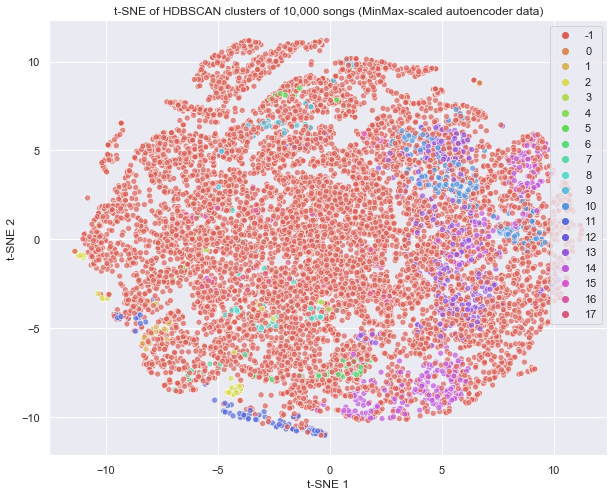

In [156]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    hue = hdb.labels_[tsne_ind],
    palette = sns.color_palette("hls", len(np.unique(hdb.labels_[tsne_ind]))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of HDBSCAN clusters of 10,000 songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')
plt.savefig('hdbscan_subset.pdf')

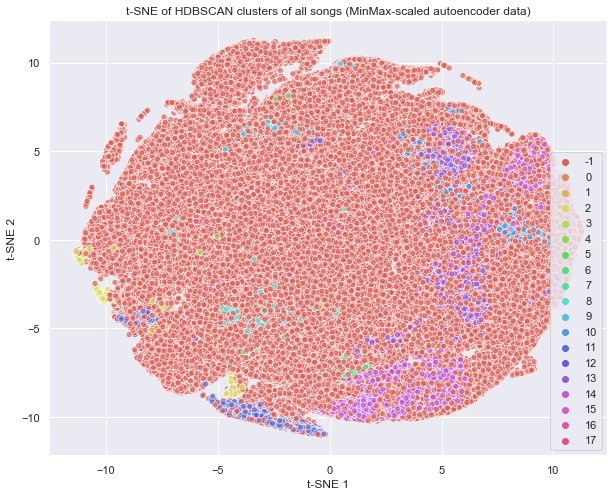

In [160]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[:, 0], 
    y = tsne_results[:, 1],
    hue = hdb.labels_,
    palette = sns.color_palette("hls", len(np.unique(hdb.labels_))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of HDBSCAN clusters of all songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')
plt.savefig('hdbscan_all.pdf')

# K-Means Clustering
Use data encoded into compressed representation to fit a clustering algorithm to group songs.

The number of clusters here maps directly to the number of families of playlists we can generate. Every song will be predicted to belong to a cluster, and the rest of the playlist generated with songs from that cluster.  
  
Read about K-Means:
- https://stats.stackexchange.com/questions/78313/clustering-inertia-formula-in-scikit-learn
- https://pythonprogramminglanguage.com/How-is-the-k-nearest-neighbor-algorithm-different-from-k-means-clustering/
- https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_jobs = -1, n_clusters = 15, n_init = 20, 
                max_iter = 300, random_state = 42, verbose = 0)

kmeans.fit(encoded_cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=15, n_init=20, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [14]:
cluster_centers = kmeans.cluster_centers_

k_labels = kmeans.labels_

In [177]:
# Sizes of fit clusters (num songs in each)
clust, count = np.unique(k_labels, return_counts = True)
for cl, co in zip(clust, count):
    print(cl, ':', co)

0 : 17434
1 : 7447
2 : 16620
3 : 10878
4 : 17170
5 : 10155
6 : 12500
7 : 20787
8 : 12098
9 : 11318
10 : 21551
11 : 5942
12 : 20485
13 : 8673
14 : 20617


Plotting t-SNE space calculated on random 10,000 subset of songs.

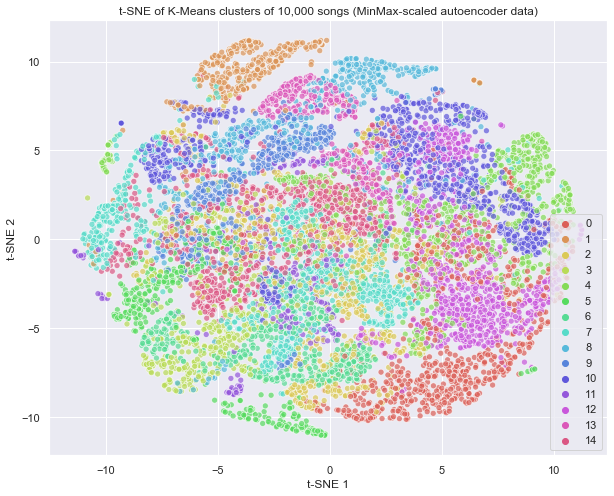

In [155]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    hue = k_labels[tsne_ind],
    palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    alpha = 0.7
)

ax.set(title = 't-SNE of K-Means clusters of 10,000 songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('kmeans_subset.pdf')

Plot cluster predicted by K-Means for all songs, shown in t-SNE space.

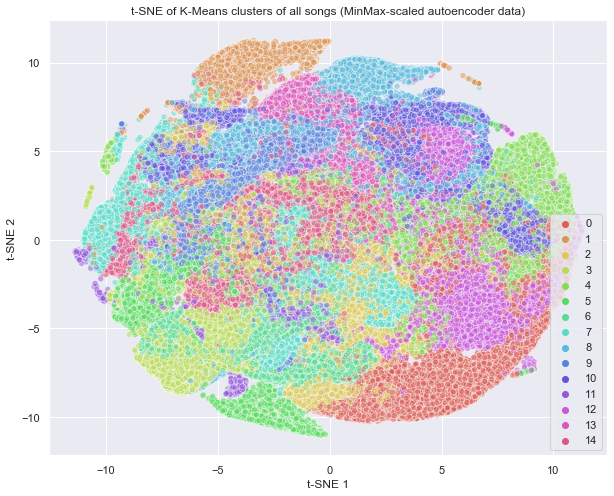

In [162]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[:, 0], 
    y = tsne_results[:, 1],
    hue = k_labels,
    palette = sns.color_palette("hls", len(np.unique(k_labels))),
    legend = "full",
    alpha = 0.5
)

ax.set(title = 't-SNE of K-Means clusters of all songs (MinMax-scaled autoencoder data)', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('kmeans_all.pdf')

**Save model and its predictions for backup and consistency**

In [692]:
pickle.dump(kmeans, open('../data/final/kmeans_model', 'wb'))
# Load model later with:
#flerp = pickle.load(open('../data/final/kmeans_model', 'rb'))
#flerp.predict(encoded_cont[0:1, :])

In [685]:
np.save('../data/final/kmeans_labels', kmeans.labels_)
# Load later with:
#derp = np.load('../data/final/kmeans_labels.npy', allow_pickle = True)

## Plot playlists in t-SNE space

Plot one playlist (ind 4) in the t-SNE space, with component songs coloured by their cluster predicted by K-Means.

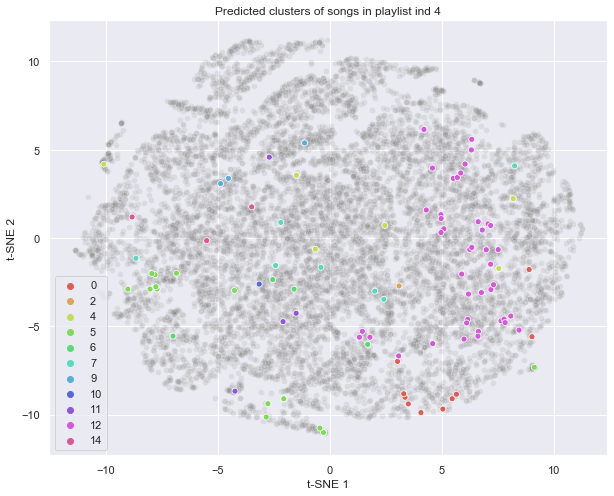

In [174]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    #hue = k_labels[tsne_ind],
    #palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    color = 'grey',
    alpha = 0.15
)

ax = sns.scatterplot(
    x = tsne_results[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,))), 0], 
    y = tsne_results[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,))), 1],
    hue = k_labels[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))],
    palette = sns.color_palette("hls", len(np.unique(k_labels[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))]))),
    legend = "full",
    alpha = 1
)

ax.set(title = 'Predicted clusters of songs in playlist ind 4', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('playlist_songs_clusters.pdf'.format(time.time()))

In [179]:
np.unique(
    kmeans.labels_[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))], 
    return_counts = True
)

(array([ 0,  2,  4,  5,  6,  7,  9, 10, 11, 12, 14], dtype=int32),
 array([10,  1,  6, 15,  4,  7,  3,  1,  4, 43,  3]))

In [138]:
kmeans.labels_[list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))]

array([12, 12,  5,  4, 12,  4, 12,  0, 12, 12, 12, 12, 12,  6, 12, 12,  4,
       12, 12, 12, 12,  4, 12, 12,  6, 12,  7, 12, 14,  4, 12,  7, 12,  0,
        4,  5, 11,  5,  5,  9,  5, 10,  9,  9,  0, 12, 14,  7, 12, 12, 12,
       12,  0, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,  0,  0,  2, 12,
       12, 12,  0,  0,  0,  6,  0,  6, 12, 12, 12, 14,  7,  7,  7, 11,  7,
        5,  5,  5,  5, 11,  5,  5, 11,  5,  5,  5,  5], dtype=int32)

Plot four playlists by colour (independent of clustering, just colour-coded to tell playlists apart) in the t-SNE space to see how they spread out in that space.

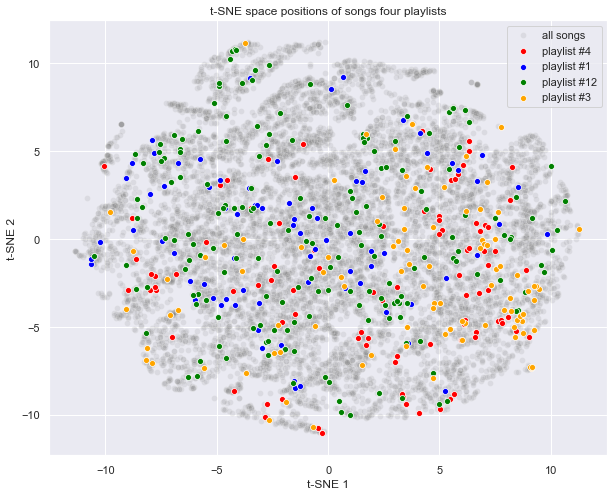

In [175]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    #hue = k_labels[tsne_ind],
    #palette = sns.color_palette("hls", len(np.unique(k_labels[tsne_ind]))),
    legend = "full",
    color = 'grey',
    alpha = 0.15,
    label = 'all songs'
)

psi = list(np.argwhere(indicators[:, 4].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'red',
    alpha = 1.0,
    label = 'playlist #4'
)

psi = list(np.argwhere(indicators[:, 1].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'blue',
    alpha = 1.0,
    label = 'playlist #1'
)

psi = list(np.argwhere(indicators[:, 12].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'green',
    alpha = 1.0,
    label = 'playlist #12'
)

psi = list(np.argwhere(indicators[:, 3].A.reshape((-1,)) == 1).reshape((-1,)))
ax = sns.scatterplot(
    x = tsne_results[psi, 0], 
    y = tsne_results[psi, 1],
    color = 'orange',
    alpha = 1.0,
    label = 'playlist #3'
)

ax.legend()

ax.set(title = 't-SNE space positions of songs four playlists',
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('playlist_songs_in_space.pdf'.format(time.time()))

# Use clustering to generate playlist from cold start

### Use first playlist as test bed

In [546]:
p_id = 0

playlist = indicators[:, p_id].A.reshape((-1,))

playlist_song_ind = list(np.argwhere(playlist == 1).reshape((-1,)))

playlist_song_ids = list(song_ids[playlist_song_ind].reshape((-1,)))
playlist_song_ids

[125250,
 787744,
 340039,
 603984,
 461894,
 653897,
 881533,
 894661,
 810569,
 49614,
 776037,
 356319]

K-Means clusters of songs in playlist

In [547]:
playlist_song_clust = kmeans.labels_[playlist_song_ind]
playlist_song_clust

array([12,  0, 12, 12, 12,  5,  5,  0,  6, 12, 12, 12], dtype=int32)

Show songs in first human-generated playlist

In [548]:
master.loc[playlist_song_ids]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.2070,...,0.008180,0.0773,0.2780,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.5520,...,0.000000,0.0969,0.3060,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.1570,...,0.000001,0.0816,0.2770,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.1700,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.3710,...,0.003920,0.1040,0.3720,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK,0.264,0.1220,...,0.349000,0.0940,0.0735,148.658,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
881533,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,121,spotify:track:6q4c1vPRZREh7nw3wG7Ixz,0.412,0.1590,...,0.772000,0.0830,0.0389,85.462,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
894661,Shawn Mendes,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,Never Be Alone,spotify:album:5wKylB0Zwnxz046O7po25D,215813,Handwritten,626,spotify:track:6wQSrFnJYm3evLsavFeCVT,0.376,0.4660,...,0.000058,0.0781,0.2760,199.835,4,"['canadian pop', 'pop', 'post-teen pop', 'vira...",93,[],18,2015-04-13
810569,Josef Salvat,spotify:artist:64PJHZDQTPPVBCdwnv22Wz,Diamonds,spotify:album:1excMWyBjh9UJqk2xYZ7o0,247600,Night Swim,44,spotify:track:6Hki3HcbeU2c4T72lJjyZ5,0.462,0.3720,...,0.000452,0.1020,0.2760,169.931,4,['gauze pop'],53,[],35,2015-10-23


## Playlist generation algorithm

In [549]:
'''
Function to generate a new playlist based on a set of starting songs.
Returns the list of song IDs in the generated playlist, including those of the seed songs.
Requires a fitted clusterer with which to predict the label of seed songs and pull from set.
'''
def generate_playlist(seed_song_ids, playlist_length, clusterer):
    # Start with seed songs, those are included too
    new_song_ids = seed_song_ids.copy()

    while len(new_song_ids) < playlist_length:
        # Pick a seed song at random
        seed_id = np.random.choice(seed_song_ids)
        # Find index in dataset of seed song
        seed_ind = np.argwhere(song_ids == seed_id)[0][0]
        # Predict cluster of seed song
        seed_clust = clusterer.predict(encoded_cont[seed_ind, :].reshape((1,-1)))[0]
        # Get indices of all songs in that cluster
        clust_inds = np.argwhere(clusterer.labels_ == seed_clust).reshape((-1,))
        # Calculate playlist co-occurrence cosine distance between seed and all songs in same cluster
        clust_seed_dist = cosine_distances(indicators[clust_inds], indicators[seed_ind]).reshape((-1,))
        # Sort indices of songs by distance to seed (co-occurrence)
        closest_songs_ind = np.argsort(clust_seed_dist)
        # Get the song IDs corresponding to those songs
        closest_songs_ids = song_ids[clust_inds][closest_songs_ind]

        # Find first of closest songs that is not already in new playlist
        # Can stop iterator at playlist length: if true that far, playlist is full anyway
        closest_songs_in_playlist = [sid in new_song_ids for sid in closest_songs_ids]

        new_song_ids.append(closest_songs_ids[np.argmin(closest_songs_in_playlist)])
    
    # Return song IDs of generated playlist (including seed songs)
    return new_song_ids

In [550]:
new_playlist = generate_playlist(playlist_song_ids[0:6], 100, kmeans)

In [551]:
# No duplicate songs
len(set(new_playlist)) == len(new_playlist)

True

In [536]:
# Inspect our new playlist
master.loc[new_song_ids].head(10)

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.207,...,0.008180,0.0773,0.2780,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.552,...,0.000000,0.0969,0.3060,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.157,...,0.000001,0.0816,0.2770,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.170,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.371,...,0.003920,0.1040,0.3720,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK,0.264,0.122,...,0.349000,0.0940,0.0735,148.658,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
834653,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Never Ending,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,202506,ANTI,277,spotify:track:6TTtJwtPEAI7yPHKR3XEKE,0.530,0.391,...,0.000070,0.1870,0.5210,82.215,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
180192,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Miserable At Best,spotify:album:0UtenXp3qVbWedKEaNRAp9,316986,A Lesson In Romantics,619,spotify:track:1ONoPkp5XIuw3tZ1GzrNKZ,0.464,0.362,...,0.000000,0.1110,0.4160,135.255,4,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],63,2007-07-10
994457,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Your Song,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,249338,Valdosta EP,41,spotify:track:7va0FN5Fim1dNPi06sqxVx,0.422,0.459,...,0.003380,0.0820,0.2270,144.895,4,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06


Plot playlist in t-SNE space

In [537]:
new_songs_ind = [list(song_ids).index(sid) for sid in new_playlist]

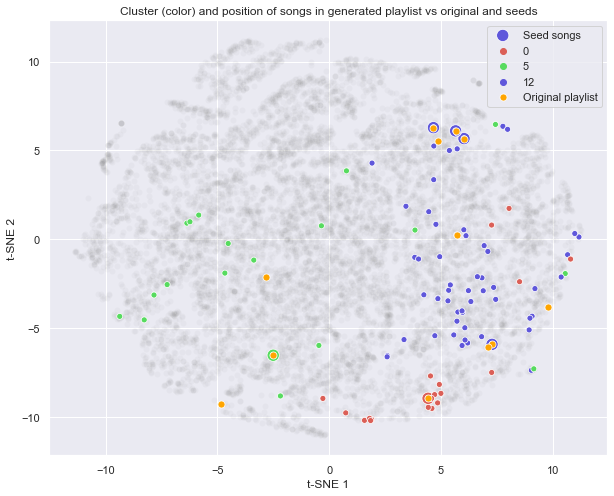

In [538]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    color = 'grey',
    alpha = 0.05
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind[0:6], 0], 
    y = tsne_results[new_songs_ind[0:6], 1],
    hue = kmeans.labels_[new_songs_ind[0:6]],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind[0:6]]).reshape((-1,)))),
    #edgecolor = 'orange',
    alpha = 1,
    legend = None,
    label = 'Seed songs',
    s = 150
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind, 0], 
    y = tsne_results[new_songs_ind, 1],
    hue = kmeans.labels_[new_songs_ind],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind]).reshape((-1,)))),
    legend = "full",
    alpha = 1
)

ax = sns.scatterplot(
    x = tsne_results[playlist_song_ind, 0], 
    y = tsne_results[playlist_song_ind, 1],
    color = 'orange',
    #legend = None,
    label = 'Original playlist',
    alpha = 1,
    s = 50
)

ax.set(title = 'Cluster (color) and position of songs in generated playlist vs original and seeds', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('generated_playlist_0.pdf'.format(time.time()))

### Try using another human-created playlist to generate another

In [622]:
p_id = 1

playlist = indicators[:, p_id].A.reshape((-1,))

playlist_song_ind = list(np.argwhere(playlist == 1).reshape((-1,)))

playlist_song_ids = list(song_ids[playlist_song_ind].reshape((-1,)))

In [623]:
new_playlist_1 = generate_playlist(playlist_song_ids[0:10], 100, kmeans)

In [624]:
new_songs_ind = [list(song_ids).index(sid) for sid in new_playlist_1]

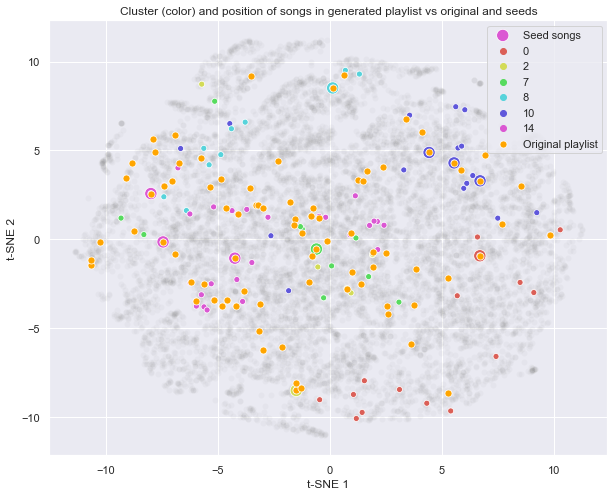

In [625]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    color = 'grey',
    alpha = 0.05
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind[0:10], 0], 
    y = tsne_results[new_songs_ind[0:10], 1],
    hue = kmeans.labels_[new_songs_ind[0:10]],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind[0:10]]).reshape((-1,)))),
    #edgecolor = 'orange',
    alpha = 1,
    legend = None,
    label = 'Seed songs',
    s = 150
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind, 0], 
    y = tsne_results[new_songs_ind, 1],
    hue = kmeans.labels_[new_songs_ind],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind]).reshape((-1,)))),
    legend = "full",
    alpha = 1
)

ax = sns.scatterplot(
    x = tsne_results[playlist_song_ind, 0], 
    y = tsne_results[playlist_song_ind, 1],
    color = 'orange',
    #legend = None,
    label = 'Original playlist',
    alpha = 1,
    s = 50
)

ax.set(title = 'Cluster (color) and position of songs in generated playlist vs original and seeds', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('generated_playlist_1.pdf'.format(time.time()))

### Measuring playlist quality
Distance to nearest playlists, and whether original playlist is among those.

**Note:** Very dependent on playlist lengths, so to be fair generate a playlist of equal length as the one used to seed, to see if that is in the top closest of the generated.

In [637]:
p_id = 0

playlist = indicators[:, p_id].A.reshape((-1,))

playlist_song_ind = list(np.argwhere(playlist == 1).reshape((-1,)))

playlist_song_ids = list(song_ids[playlist_song_ind].reshape((-1,)))

In [638]:
new_playlist = generate_playlist(playlist_song_ids[0:5], len(playlist_song_ids), kmeans)

In [639]:
new_songs_ind = [list(song_ids).index(sid) for sid in new_playlist]

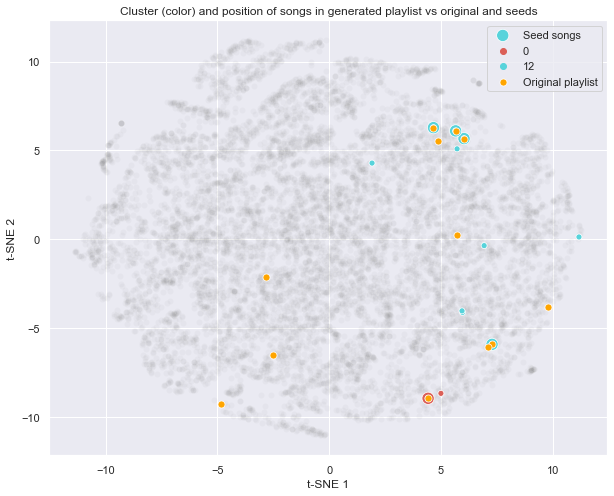

In [640]:
plt.figure(figsize=(10, 8))

ax = sns.scatterplot(
    x = tsne_results[tsne_ind, 0], 
    y = tsne_results[tsne_ind, 1],
    color = 'grey',
    alpha = 0.05
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind[0:5], 0], 
    y = tsne_results[new_songs_ind[0:5], 1],
    hue = kmeans.labels_[new_songs_ind[0:5]],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind[0:10]]).reshape((-1,)))),
    #edgecolor = 'orange',
    alpha = 1,
    legend = None,
    label = 'Seed songs',
    s = 150
)

ax = sns.scatterplot(
    x = tsne_results[new_songs_ind, 0], 
    y = tsne_results[new_songs_ind, 1],
    hue = kmeans.labels_[new_songs_ind],
    palette = sns.color_palette("hls", len(np.unique(kmeans.labels_[new_songs_ind]).reshape((-1,)))),
    legend = "full",
    alpha = 1
)

ax = sns.scatterplot(
    x = tsne_results[playlist_song_ind, 0], 
    y = tsne_results[playlist_song_ind, 1],
    color = 'orange',
    #legend = None,
    label = 'Original playlist',
    alpha = 1,
    s = 50
)

ax.set(title = 'Cluster (color) and position of songs in generated playlist vs original and seeds', 
       xlabel = 't-SNE 1', ylabel = 't-SNE 2')

plt.savefig('generated_playlist_same_length.pdf'.format(time.time()))

#### Calculate distance to human-created playlists and manually inspect the closest-matching

In [641]:
# Create songs-in-playlist indicator vector for our generated playlist
indicators_generated = np.zeros((1, indicators.shape[0]))
indicators_generated[0, new_songs_ind] = 1

In [642]:
playlist_dists = cosine_distances(indicators.T, indicators_generated).reshape((-1,))

In [643]:
# Get song indicators of the 5 closest playlists to the one we generated
sorted_playlists = indicators[:, np.argsort(playlist_dists)[0:5]]

Verify that distance measure is not complete nonsense.

Indeed, some have distance < 1 (i.e. something in common).

In [644]:
np.sort(closest_playlists)[0:5]

array([0.71711053, 0.73299937, 0.76201676, 0.7628821 , 0.76480988])

#### Song IDs in the generated playlist (first) versus the closest human-created

In [681]:
set(new_playlist)

{125250,
 195814,
 340039,
 460009,
 461894,
 468524,
 521562,
 541794,
 603984,
 772125,
 787744,
 834653}

In [678]:
set(list(song_ids[np.argwhere(sorted_playlists[:, 0].A.flatten() == 1)].flatten()))

{49614,
 125250,
 340039,
 356319,
 461894,
 603984,
 653897,
 776037,
 787744,
 810569,
 881533,
 894661}

In [682]:
set(list(song_ids[np.argwhere(sorted_playlists[:, 1].A.flatten() == 1)].flatten()))

{8489,
 68416,
 138902,
 191443,
 199776,
 310316,
 335121,
 343268,
 371613,
 468524,
 603984,
 613612,
 793792,
 815849,
 834653,
 840310,
 953321,
 974881}

In [683]:
set(list(song_ids[np.argwhere(sorted_playlists[:, 2].A.flatten() == 1)].flatten()))

{142143,
 159866,
 236586,
 340039,
 355799,
 359786,
 446217,
 567978,
 599113,
 772125}

#### Generated playlist

In [648]:
master.loc[song_ids[new_songs_ind]]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.2070,...,0.008180,0.0773,0.278,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.5520,...,0.000000,0.0969,0.306,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.1570,...,0.000001,0.0816,0.277,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.1700,...,0.000000,0.1390,0.145,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.3710,...,0.003920,0.1040,0.372,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
834653,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Never Ending,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,202506,ANTI,277,spotify:track:6TTtJwtPEAI7yPHKR3XEKE,0.530,0.3910,...,0.000070,0.1870,0.521,82.215,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
772125,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Already Gone,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,243007,"Covers, Vol. 2",253,spotify:track:5zCunX8URvLoBHlg1Fnjv6,0.418,0.2480,...,0.000004,0.1080,0.298,130.953,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
521562,Stars,spotify:artist:2EO56JK4txid1Pss9GVbOL,Personal,spotify:album:4I9BDOOxpLw2ClFDRhTJaN,247173,In Our Bedroom After The War,17,spotify:track:42MSqGOJ5o2VQgC01Zlcd5,0.580,0.1800,...,0.037000,0.2310,0.137,129.805,4,"['canadian indie', 'canadian pop', 'chamber po...",50,[],38,2007-09-25
195814,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Fix You (Glee Cast Version),spotify:album:082BH67sSIDefLxUp8GgNm,274760,"Glee: The Music, The Complete Season Three",23,spotify:track:1VzkNDKMsnkVf3nV6Ki5GW,0.438,0.4070,...,0.000011,0.1160,0.275,133.970,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],47,2011


#### Closest matching

In [684]:
master.loc[song_ids[np.argwhere(sorted_playlists[:, 0].A.flatten() == 1)].flatten()]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
125250,Rachael Yamagata,spotify:artist:7w0qj2HiAPIeUcoPogvOZ6,Elephants,spotify:album:6KzK9fDNmj7GHFbcE4gVJD,253701,Elephants...Teeth Sinking Into Heart,14,spotify:track:0y4TKcc7p2H6P0GJlt01EI,0.312,0.2070,...,0.008180,0.0773,0.2780,93.778,4,"['acoustic pop', 'folk-pop', 'lilith']",52,[],40,2008-10-06
787744,Glee Cast,spotify:artist:0SCbttzoZTnLFebDYmAWCm,Somewhere Only We Know (Glee Cast Version),spotify:album:6WlzaRoDShdgVgaqJRjyNH,184653,"Glee: The Music, The Complete Season Two",86,spotify:track:66mmvchQ4C3LnPzq4DiAI3,0.493,0.5520,...,0.000000,0.0969,0.3060,85.973,4,"['glee club', 'hollywood', 'post-teen pop']",80,[],49,2010
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.1570,...,0.000001,0.0816,0.2770,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.1700,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
461894,Mayday Parade,spotify:artist:3WfJ1OtrWI7RViX9DMyEGy,Terrible Things,spotify:album:4eVvdwd6AC7nh9TvJD9XyT,238076,Valdosta EP,339,spotify:track:3ZjnFYlal0fXN6t61wdxhl,0.285,0.3710,...,0.003920,0.1040,0.3720,154.989,3,"['emo', 'neon pop punk', 'pop emo', 'pop punk']",68,[],53,2009-10-06
653897,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,To Build A Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,371320,Ma Fleur,1593,spotify:track:54KFQB6N4pn926IUUYZGzK,0.264,0.1220,...,0.349000,0.0940,0.0735,148.658,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
881533,The Cinematic Orchestra,spotify:artist:32ogthv0BdaSMPml02X9YB,That Home,spotify:album:5cPHT4yMCfETLRYAoBFcOZ,103920,Ma Fleur,121,spotify:track:6q4c1vPRZREh7nw3wG7Ixz,0.412,0.1590,...,0.772000,0.0830,0.0389,85.462,4,"['acid jazz', 'chamber pop', 'downtempo', 'ele...",65,[],63,2007-05-07
894661,Shawn Mendes,spotify:artist:7n2wHs1TKAczGzO7Dd2rGr,Never Be Alone,spotify:album:5wKylB0Zwnxz046O7po25D,215813,Handwritten,626,spotify:track:6wQSrFnJYm3evLsavFeCVT,0.376,0.4660,...,0.000058,0.0781,0.2760,199.835,4,"['canadian pop', 'pop', 'post-teen pop', 'vira...",93,[],18,2015-04-13
810569,Josef Salvat,spotify:artist:64PJHZDQTPPVBCdwnv22Wz,Diamonds,spotify:album:1excMWyBjh9UJqk2xYZ7o0,247600,Night Swim,44,spotify:track:6Hki3HcbeU2c4T72lJjyZ5,0.462,0.3720,...,0.000452,0.1020,0.2760,169.931,4,['gauze pop'],53,[],35,2015-10-23


#### 2nd closest matching

In [699]:
master.loc[song_ids[np.argwhere(sorted_playlists[:, 1].A.flatten() == 1)].flatten()]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
8489,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Same Ol’ Mistakes,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,397093,ANTI,433,spotify:track:046irIGshCqu24AjmEWZtr,0.440,0.803,...,0.002820,0.0591,0.5010,151.777,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
68416,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Consideration,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,161066,ANTI,692,spotify:track:0WgBb7XgdtbUW0GlYel9mH,0.883,0.584,...,0.000004,0.0869,0.7840,144.975,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
191443,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Needed Me,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,191600,ANTI,5369,spotify:track:1Tt4sE4pXi57mTD1GCzsqm,0.671,0.314,...,0.000000,0.0825,0.2960,110.898,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
199776,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Higher,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,120626,ANTI,590,spotify:track:1XrrzhGLErbkiwH5v3xww9,0.292,0.567,...,0.000001,0.1190,0.3920,153.199,3,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
310316,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Woo,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,235586,ANTI,260,spotify:track:2OvftP4F7VMMTdfyUx883s,0.420,0.466,...,0.003890,0.2980,0.1850,115.004,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
335121,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Love On The Brain,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,224000,ANTI,3073,spotify:track:2aksifNn5ph8igDOkPBA02,0.509,0.637,...,0.000011,0.0789,0.3780,172.006,3,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
468524,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,James Joint,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,72080,ANTI,207,spotify:track:3cuGpP8vUSC1aq8tjD3J2c,0.399,0.203,...,0.000163,0.2700,0.4050,134.202,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
603984,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,Close To You,spotify:album:3Q149ZH46Z0f3oDR7vlDYV,223226,ANTI,500,spotify:track:4gFxywaJejXWxo0NjlWzgg,0.494,0.170,...,0.000000,0.1390,0.1450,80.098,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28
613612,Rihanna,spotify:artist:5pKCCKE2ajJHZ9KAiaK11H,"Yeah, I Said It",spotify:album:3Q149ZH46Z0f3oDR7vlDYV,133080,ANTI,559,spotify:track:4kqxy0SvQ2N34nOJ9ggfMu,0.509,0.380,...,0.000001,0.3600,0.2490,127.880,4,"['barbadian pop', 'dance pop', 'pop', 'post-te...",91,[],58,2016-01-28


#### 3rd closest matching

In [700]:
master.loc[song_ids[np.argwhere(sorted_playlists[:, 2].A.flatten() == 1)].flatten()]

,artist_name,artist_uri,track_name,album_uri,duration_ms,album_name,count,track_uri,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,artist_genres,artist_popularity,album_genres,album_popularity,album_release_date
song_id,,,,,,,,,,,,,,,,,,,,,
340039,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Chasing Cars,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,242564,"Covers, Vol. 2",401,spotify:track:2d7LPtieXdIYzf7yHPooWd,0.467,0.157,...,0.000001,0.0816,0.277,108.130,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
772125,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Already Gone,spotify:album:0UIIvTTWNB3gRQWFoxoEDh,243007,"Covers, Vol. 2",253,spotify:track:5zCunX8URvLoBHlg1Fnjv6,0.418,0.248,...,0.000004,0.1080,0.298,130.953,4,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],67,2016-11-04
142143,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Total Eclipse of the Heart,spotify:album:3y3pxFKLvqdAyL9RA4Hd3o,244824,"Covers, Vol. 1",102,spotify:track:1650yatyByhD11nXbD8ktd,0.450,0.257,...,0.000000,0.1590,0.366,100.240,1,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],59,2014-05-16
355799,Sleeping At Last,spotify:artist:0MeLMJJcouYXCymQSHPn8g,Turning Page,spotify:album:7lh3v8GsuH6TKFQcTimkji,255893,Turning Page,644,spotify:track:2kfGoV9a5dbSKCNmUWH2ZF,0.307,0.371,...,0.025300,0.1100,0.189,115.241,3,"['ambient worship', 'dreamo', 'folk-pop', 'pop']",75,[],60,2012-06-18
159866,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,4u,spotify:album:5cEJ9XTxsUKterwl1nAm2I,210146,Dead,112,spotify:track:1Eeof8IMDWLXEaAtjTW1ny,0.723,0.448,...,0.000000,0.1410,0.630,81.978,4,"['pop', 'pop rap']",88,[],64,2015-06-02
236586,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,Dirty Laundry,spotify:album:5cEJ9XTxsUKterwl1nAm2I,160106,Dead,78,spotify:track:1pVn6q9pKMDIAH93UuaWUN,0.766,0.343,...,0.000000,0.3530,0.306,100.216,4,"['pop', 'pop rap']",88,[],64,2015-06-02
359786,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,90210,spotify:album:5cEJ9XTxsUKterwl1nAm2I,207733,Dead,114,spotify:track:2mZF9Se9RWzjxK6EnXvIZG,0.820,0.430,...,0.000002,0.1100,0.424,89.986,4,"['pop', 'pop rap']",88,[],64,2015-06-02
446217,blackbear,spotify:artist:2cFrymmkijnjDg9SS92EPM,Idfc,spotify:album:5cEJ9XTxsUKterwl1nAm2I,207026,Dead,150,spotify:track:3SErMoIKdRELto2OspGs5L,0.718,0.422,...,0.000000,0.1700,0.455,144.678,4,"['pop', 'pop rap']",88,[],64,2015-06-02
599113,Dirty Heads,spotify:artist:6GkJh85o22LfD2vgL9DP6f,Lay Me Down,spotify:album:5sfADrGjV3NsjweKZzriPX,217520,Any Port In A Storm,953,spotify:track:4duRCqphyoANSfH8oUl6c2,0.710,0.725,...,0.000002,0.0912,0.768,170.101,4,"['reggae fusion', 'reggae rock']",69,[],54,2008
